# MovieLens Data Analysis

First, import all the python libraries needed to conduct Data Analysis and Data Visualizations

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the movie_rating.csv file

In [8]:
df = pd.read_csv('../data/movie_ratings.csv')

# Summary Statistics

,Number of Users,Number of Movies Rated,Total Ratings,Mean Rating,Median Rating,Std Dev
0,943,1682,212595,3.55,4.0,1.12


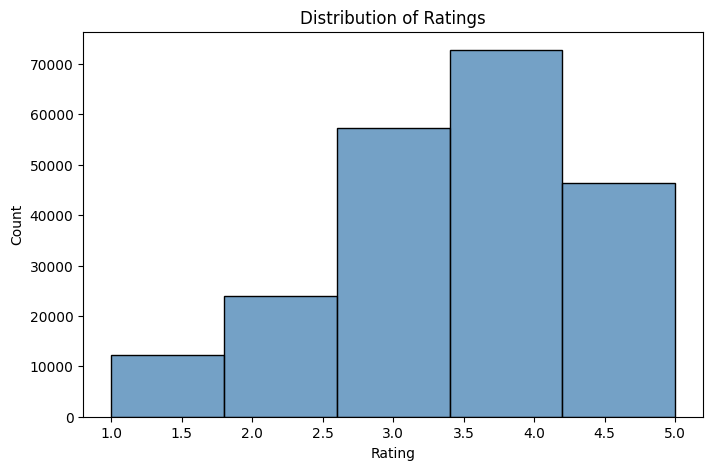

In [ ]:
# Table of key stats
summary = {
    "Number of Users": [df['user_id'].nunique()],
    "Number of Movies Rated": [df['movie_id'].nunique()],
    "Total Ratings": [len(df)],
    "Mean Rating": [df['rating'].mean().round(2)],
    "Median Rating": [df['rating'].median()],
    "Std Dev": [df['rating'].std().round(2)]
}

display(pd.DataFrame(summary))

# Histogram of ratings
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=5, kde=False, color="steelblue", edgecolor="black")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The dataset contains 943 users who rated 1,682 movies, with a total of 212,595 ratings. The average rating is about 3.55 out of 5, and the histogram shows that most ratings fall in the 3–4 range. This suggests users typically have positive ratings, but rarely give high ratings (greater than 4).

# QUESTION 1: What's the breakdown of genres for the movies that were rated?

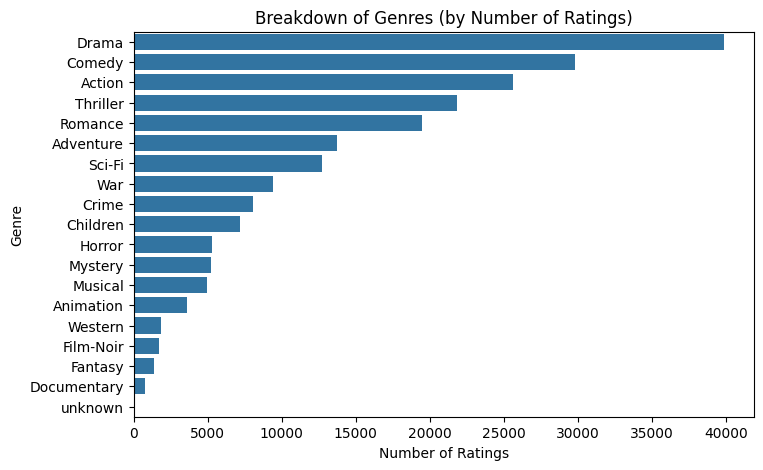

In [45]:
# Split genres
df_genres = df.copy()
df_genres['genres'] = df_genres['genres'].str.split('|')

# Explode genres into separate rows
df_genres = df_genres.explode('genres')

genre_counts = df_genres['genres'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.title("Breakdown of Genres (by Number of Ratings)")
plt.xlabel("Number of Ratings")
plt.ylabel("Genre")
plt.show()

Looking at the genre breakdown, Drama and Comedy dominate the number of ratings. However, Action, Thriller, and Romance are next in place with hgihest number of ratings as well. On the contary, genres like Film-Noir and Documentary have much fewer ratings maybe because they do not appeal as much compared to genres like Drama and Comedy to audiences. It could also be that fewer movies are made in those categories as well leading to fewer number of ratings. This dataset shows how it is mainly influenced by mainstream genres. 

# QUESTION 2: Which genres have the highest viewer satisfaction (highest ratings)?

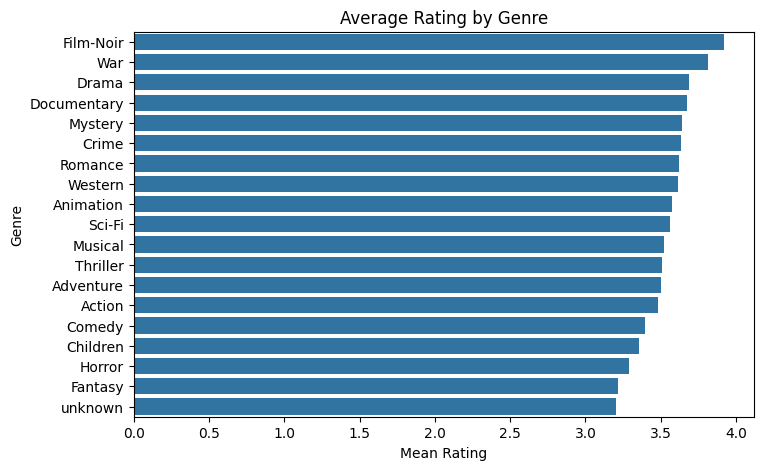

In [46]:
genre_means = df_genres.groupby('genres')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(y=genre_means.index, x=genre_means.values)
plt.title("Average Rating by Genre")
plt.xlabel("Mean Rating")
plt.ylabel("Genre")
plt.show()

Now, by looking at the average ratings per genre to see which genres have the highest viewer satisfaction, we see the average ratings across the genres changes the story. It looks like smaller genres like Film-Noir and War rises with higher mean ratings, even though they do not get as much total ratings. The mainstream genres like Drama and Romance are still strong because they have a larger total film count, evening out the average. The main takeway from analyzing this data is that small genres may not have as many ratings, but the ratings they do have shows people really like the movie whoever watched them. 

# QUESTION 3: How does mean rating change across movie release years?

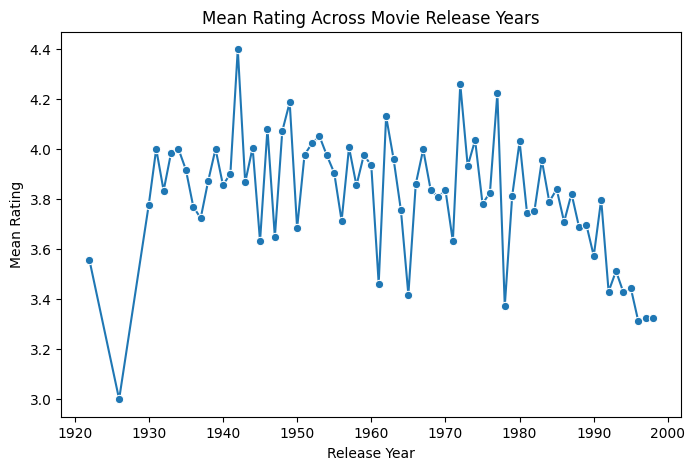

In [47]:
year_means = df.groupby('year')['rating'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=year_means.index, y=year_means.values, marker="o")
plt.title("Mean Rating Across Movie Release Years")
plt.xlabel("Release Year")
plt.ylabel("Mean Rating")
plt.show()

Looking at the plot, movies from the 1930s through the 1960s generally keep ratings in the high 3’s to low 4’s, with some spikes even above 4.2. There’s a lot of fluctuation year to year, but the overall level stays strong. After the 1970s and especially into the 1980s and 1990s, the mean ratings start to trend downward, leaning closer to 3.3–3.5 in the late 1990s. This suggests that older films, maybe “classics” that people still revisit, tend to get rated more favorably, while newer films in this dataset receive more mixed or critical ratings. The sharp drops in later decades also stand out, which could mean newer movies attract more varied opinions.

# QUESTION 4: What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?

In [ ]:
movie_stats = df.groupby(['movie_id', 'title']).agg(
    mean_rating=('rating','mean'),
    num_ratings=('rating','count')
).reset_index()

# Movies with at least 50 ratings
top_50 = (
    movie_stats[movie_stats['num_ratings'] >= 50]
    .sort_values('mean_rating', ascending=False)
    .head(5)
)

# Movies with at least 150 ratings
top_150 = (
    movie_stats[movie_stats['num_ratings'] >= 150]
    .sort_values('mean_rating', ascending=False)
    .head(5)
)

print("Top 5 (≥50 ratings):")
display(top_50)

print("Top 5 (≥150 ratings):")
display(top_150)

Top 5 (≥50 ratings):


,movie_id,title,mean_rating,num_ratings
407,408,"Close Shave, A (1995)",4.491071,336
317,318,Schindler's List (1993),4.466443,596
168,169,"Wrong Trousers, The (1993)",4.466102,236
482,483,Casablanca (1942),4.456790,729
113,114,Wallace & Gromit: The Best of Aardman Animatio...,4.447761,67


Top 5 (≥150 ratings):


,movie_id,title,mean_rating,num_ratings
407,408,"Close Shave, A (1995)",4.491071,336
317,318,Schindler's List (1993),4.466443,596
168,169,"Wrong Trousers, The (1993)",4.466102,236
482,483,Casablanca (1942),4.456790,729
63,64,"Shawshank Redemption, The (1994)",4.445230,283


With at least 50 ratings, the list includes highly rated titles such as A Close Shave (1995) and The Wrong Trousers (1993), which are short films with smaller but passionate audiences. Their strong scores push them to the top even though they don’t have the same level of mainstream recognition.

With at least 150 ratings, the list shifts slightly — The Shawshank Redemption (1994) appears, replacing Wallace & Gromit: The Best of Aardman Animation. This reflects the fact that movies with broader popularity start to rise in the rankings once the cutoff is higher.

The key takeaway is that lower thresholds highlight niche favorites, while higher thresholds surface widely recognized classics. Both views are valid, but they answer slightly different questions: “What small-audience films are loved the most?” vs. “What big-audience films are loved the most?”